## <span style="color:crimson;">WHAT IS A/B TESTING?

A/B testing, also known as split testing, refers to a randomized experimentation process where two or more versions of a variable (web page, page element, etc.) are shown to different segments of website visitors at the same time to determine which version leaves the maximum impact and drive business metrics

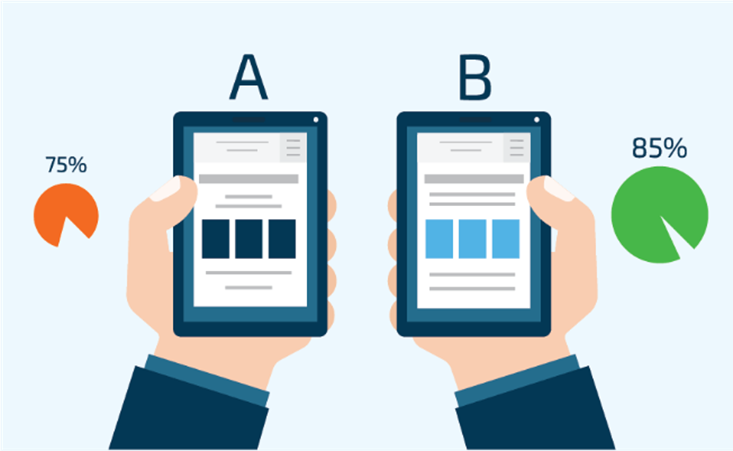

**<span style="color:crimson;">Context**

Facebook recently introduced a new type of bidding, average bidding, as an alternative to the current type of bidding called maximum bidding. 
The system works in such a way that whoever pays more, its advertisement is shown to users more. 

We can say that; show this ad but I will pay maximum 10 USD or 6 USD on average per impression. If someone else pays maximum of 9 USD or an average of 5 USD to show their ads to the target customer, our ad will be shown to the user, because of the our higher offer.

In this dataset you can find the analysis result of comparison of these two product regarding observations in last 40 days

**<span style="color:crimson;">Business Problem**

As a company that will advertise on Facebook, we want to understand which option is more advantageous for us. 

* Which of these two options will increase our number of clicks and purchases? 
* Is there a significant difference between the two options?

To find the answer to these questions, we are applying the AB Test today.

**<span style="color:crimson;">Task Details**

* Importing Libraries and Data
* Data Preprocessing
* Analyse 
* A/B Test
* Evaluation of the Results

**<span style="color:crimson;">Attribute Information:**

* **Impression :** Ad impressions
* **Click :** Number of clicks on the displayed ad
* **Purchase :** The number of products purchased after the ads clicked
* **Earning:** Earnings after purchased products

## <span style="color:crimson;">1. IMPORTING LIBRARIES AND DATA

In [1]:
!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import shapiro,levene,ttest_ind, mannwhitneyu
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option('display.float_format', lambda x: '%.4f' % x)

     |████████████████████████████████| 242 kB 596 kB/s            
/kaggle/input/ab-testing-dataset/ab_testing.xlsx


In [2]:
control_df = pd.read_excel("../input/ab-testing-dataset/ab_testing.xlsx", sheet_name='Control Group')# maximum bidding
test_df = pd.read_excel("../input/ab-testing-dataset/ab_testing.xlsx", sheet_name='Test Group') # average bidding


In [3]:
# Control Group (Maximum bidding)
control_df.describe().T


,count,mean,std,min,25%,50%,75%,max
Impression,40.0000,101711.4491,20302.1579,45475.9430,85726.6903,99790.7011,115212.8165,147539.3363
Click,40.0000,5100.6574,1329.9855,2189.7532,4124.3041,5001.2206,5923.8036,7959.1251
Purchase,40.0000,550.8941,134.1082,267.0289,470.0955,531.2063,637.9571,801.7950
Earning,40.0000,1908.5683,302.9178,1253.9895,1685.8472,1975.1605,2119.8028,2497.2952


In [4]:
# Test Goup (Average_bidding)
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.0000,120512.4118,18807.4487,79033.8349,112691.9708,119291.3008,132050.5789,158605.9205
Click,40.0000,3967.5498,923.0951,1836.6299,3376.8190,3931.3598,4660.4979,6019.6951
Purchase,40.0000,582.1061,161.1525,311.6295,444.6268,551.3557,699.8624,889.9105
Earning,40.0000,2514.8907,282.7309,1939.6112,2280.5374,2544.6661,2761.5454,3171.4897


##### <span style="color:crimson;">Comparison of Purchase and Earning Descriptive Statistics of Two Groups

I'm putting together the metrics I want to compare by creating a dataframe.

In [5]:
desc_compare_df = pd.DataFrame ({"Control_Impression": control_df["Impression"].describe (),"Test_Impression": test_df["Impression"].describe (),
                                 "Control_Click": control_df["Click"].describe (),"Test_Click": test_df["Click"].describe (),
                                 "Control_Purchase": control_df["Purchase"].describe (),"Test_Purchase": test_df["Purchase"].describe (),
                                 "Control_Earning": control_df["Earning"].describe (),"Test_Earning": test_df["Earning"].describe ()})

In [6]:
desc_compare_df.head() 

,Control_Impression,Test_Impression,Control_Click,Test_Click,Control_Purchase,Test_Purchase,Control_Earning,Test_Earning
count,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000,40.0000
mean,101711.4491,120512.4118,5100.6574,3967.5498,550.8941,582.1061,1908.5683,2514.8907
std,20302.1579,18807.4487,1329.9855,923.0951,134.1082,161.1525,302.9178,282.7309
min,45475.9430,79033.8349,2189.7532,1836.6299,267.0289,311.6295,1253.9895,1939.6112
25%,85726.6903,112691.9708,4124.3041,3376.8190,470.0955,444.6268,1685.8472,2280.5374


Although the mean and median of the test group are high, let's check if there is a significant difference since the standard deviation is also high. We can check this by calculating confidence interval of Purchase for both group

In [7]:
sms.DescrStatsW (control_df["Purchase"]).tconfint_mean ()

(508.0041754264924, 593.7839421139709)

In [8]:
sms.DescrStatsW (test_df["Purchase"]).tconfint_mean ()

(530.5670226990062, 633.6451705979289)

It can be seen that the confidence intervals of the Purchases for these two groups overlap. It means they are not significantly different from each other

In [9]:
earning_df = pd.DataFrame ({"Control_Earning": control_df["Earning"].describe (),
                            "Test_Earning": test_df["Earning"].describe ()})
earning_df.head()

,Control_Earning,Test_Earning
count,40.0000,40.0000
mean,1908.5683,2514.8907
std,302.9178,282.7309
min,1253.9895,1939.6112
25%,1685.8472,2280.5374


In [10]:
sms.DescrStatsW (control_df["Earning"]).tconfint_mean ()

(1811.6904932901255, 2005.4461063153728)

In [11]:
sms.DescrStatsW (test_df["Earning"]).tconfint_mean ()

(2424.469019772786, 2605.3124455284496)

It can be seen that the confidence intervals of the earnings for these two groups do not overlap. It means they are significantly different from each other. The average earning of the Test Group is higher than that of the Control Group.

# <span style="color:crimson;">AB TESTING
## <span style="color:crimson;">1. Assumption Check
### <span style="color:crimson;">1.1 Normality Assumption

In order to apply an AB Test, the Normality and Variance homogeneity assumptions should be satisfied.

If normality and variance homogeneity is provided, an independent two-sample t-test (parametric test) is applied.
If normality and homogeneity of variance are not provided, the Mann-Whitney U test (non-parametric test) is performed.

**<span style="color:crimson;">Normality Assumption Check**

 The Shapiro-Wilks Test will be applied for the Normality

* **H0 :** There is no statistically significant difference between sample distribution and theoretical normal distribution
* **H1 :** There is statistically significant difference between sample distribution and theoretical normal distribution

H0 is rejected if the p_value is less than 0.05.

##### <span style="color:crimson;">Graphical observation of the normal distribution

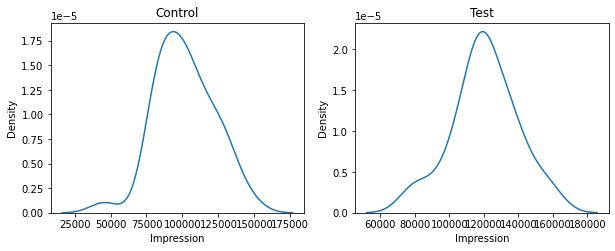

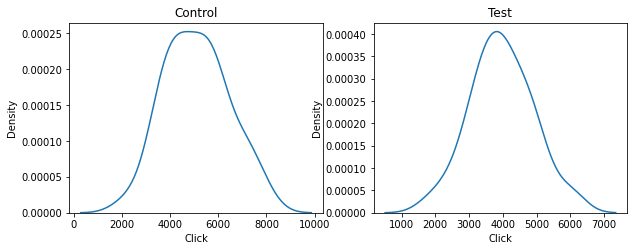

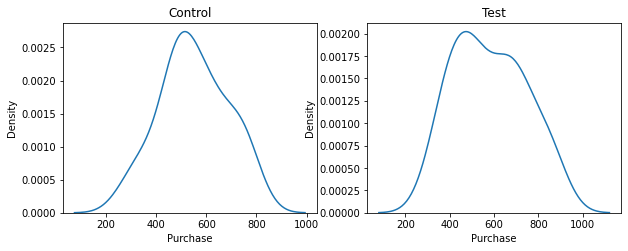

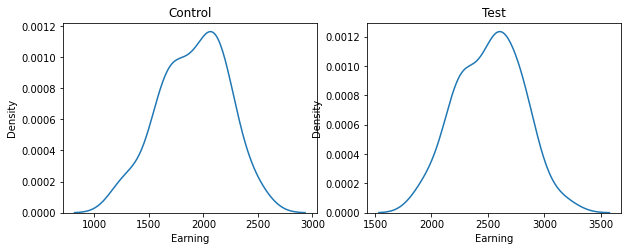

In [12]:
cols = ['Impression','Click','Purchase','Earning']
for col in cols:
        fig, ax = plt.subplots(1,2)
        fig.set_figheight(3.5)
        fig.set_figwidth(10)
        sns.distplot (control_df[col], hist=False,ax=ax[0])
        sns.distplot (test_df[col], hist=False,ax=ax[1])
        ax[0].set_title('Control')
        ax[1].set_title('Test')
        plt.show()

A normal distribution tendency is observed. But it may be missleading so it needs to be checked

In [13]:
print('Control Group \n')
#cols = ['Earning_Per_Click','Impression_Per_Click','Puchasing_Per_Impression']
for col in cols:
    test_stat, pvalue = shapiro(control_df[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue))

Control Group 

Impression
Test Stat = 0.9697, p-value = 0.3514 

Click
Test Stat = 0.9844, p-value = 0.8461 

Purchase
Test Stat = 0.9773, p-value = 0.5891 

Earning
Test Stat = 0.9756, p-value = 0.5306 



All p-values are higher than 0.05 it means H0 cannot be rejected. The assumption of normality is provided.

In [14]:
print('Test Group \n')
#cols = ['Earning_Per_Click','Impression_Per_Click','Puchasing_Per_Impression']
for col in cols:
    test_stat, pvalue = shapiro(test_df[col])
    print(col)
    print('Test Stat = %.4f, p-value = %.4f \n' % (test_stat, pvalue) )

Test Group 

Impression
Test Stat = 0.9720, p-value = 0.4148 

Click
Test Stat = 0.9896, p-value = 0.9699 

Purchase
Test Stat = 0.9589, p-value = 0.1541 

Earning
Test Stat = 0.9780, p-value = 0.6163 



All p-values are higher than 0.05 it means H0 cannot be rejected. The assumption of normality is provided.

### <span style="color:crimson;">1.2. Variance Homogeneity
Levene’s Test will be applied for the Homogeneity of variances

* **H0:** There is no statistically significant difference between the variance of variance of the related variables of the 2 groups.

* **H1:** There is a statistically significant difference between the variance of variance of the related variables of the 2 groups.

H0 is rejected if the p_value is less than 0.05.


In [15]:
for col in cols:
    ttest_lev, p_value_lev = levene (control_df[col], test_df[col])
    print(col)
    print ("ttest statistics: {}\np_value: {}\n".format (ttest_lev, p_value_lev))

Impression
ttest statistics: 0.5864573472359864
p_value: 0.44610356360916026

Click
ttest statistics: 6.304093663057767
p_value: 0.014114218126827834

Purchase
ttest statistics: 2.6392694728747363
p_value: 0.10828588271874791

Earning
ttest statistics: 0.35323781392537446
p_value: 0.5540060067717659



All of the p values except those for the Click are higher than 0.05, it means we cannot reject the H0 hypothesis. Therefore, we can say that there is NO statistically significant difference between the variance distributions of the Impression,Purchase and Earning values of the 2 groups.

p value for click is lower than 0.05 so we can reject H0 hypothesis. There is statistically significant difference between the variance distributions of the Click values of the 2 groups.

## <span style="color:crimson;">2. Implementation of the Hypothesis

### <span style="color:crimson;">2.1 Comparing Two Group Means 

For the Impression,Purchase and Earning normality and variance homogeneity is provided, an independent two-sample t-test (parametric test) will be applied.
For Click normality assuption is provided but homogeneity of variance is not provided,so the Mann-Whitney U test (non-parametric test) will be performed.

#### <span style="color:crimson;">2.1.1 Parametric Comparison (Independent Two-Sample T-Test)
The Independent Two-Sample T Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different.

**Hypotheses**

* **H0:** µ1 = µ2 (the two population means are equal)

* **H1:** µ1 ≠ µ2 (the two population means are not equal)




In [16]:
ttest_ind_Imp, p_value_ind_Imp = ttest_ind (control_df["Impression"], test_df["Impression"], equal_var=True)
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_Imp, p_value_ind_Imp))

ttest statistics: -4.296597673723916
p_value: 4.954754307167222e-05


In [17]:
ttest_ind_pur, p_value_ind_pur = ttest_ind (control_df["Purchase"], test_df["Purchase"], equal_var=True)
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_pur, p_value_ind_pur))

ttest statistics: -0.9415584300312964
p_value: 0.34932579202108416


In [18]:
ttest_ind_earn, p_value_ind_earn = ttest_ind (control_df["Earning"], test_df["Earning"], equal_var=True)
print ("ttest statistics: {}\np_value: {}".format (ttest_ind_earn, p_value_ind_earn))

ttest statistics: -9.254514649275333
p_value: 3.464659528461278e-14


#### <span style="color:crimson;">2.1.2 Nonparametric Comparison (Mann-Whitney U Test)

In [19]:
ttest_value_Click, p_value_Click = mannwhitneyu (control_df["Click"], test_df["Click"])
print ("ttest statistics: {}\np_value: {}".format (ttest_value_Click, p_value_Click))

ttest statistics: 1198.0
p_value: 0.00013080100099724853



### <span style="color:crimson;">2.2 Two Group Ratio Comparison (Two Sample Ratio Test)

So far, we have compared the two groups over the features given in the data set. Now, we continue to compare over the proportional features we have derived. We will use Two Sample Ratio Test (z test) for ratio comparisons.

#### <span style="color:crimson;">Derivation of New Features for Test and Control Group

In [20]:
groups = [control_df, test_df]
for group in groups:
    group["Click_Per_Impression"] = group["Click"] / group["Impression"]
    group["Earning_Per_Click"] = group["Earning"] / group["Click"]
    group["Puchasing_Per_Impression"] = group["Purchase"] / group["Impression"]
control_df.head ()

,Impression,Click,Purchase,Earning,Click_Per_Impression,Earning_Per_Click,Puchasing_Per_Impression
0,82529.4593,6090.0773,665.2113,2311.2771,0.0738,0.3795,0.0081
1,98050.4519,3382.8618,315.0849,1742.8069,0.0345,0.5152,0.0032
2,82696.0235,4167.9657,458.0837,1797.8274,0.0504,0.4313,0.0055
3,109914.4004,4910.8822,487.0908,1696.2292,0.0447,0.3454,0.0044
4,108457.7626,5987.6558,441.0340,1543.7202,0.0552,0.2578,0.0041


In [21]:
test_df.head ()

,Impression,Click,Purchase,Earning,Click_Per_Impression,Earning_Per_Click,Puchasing_Per_Impression
0,120103.5038,3216.5480,702.1603,1939.6112,0.0268,0.6030,0.0058
1,134775.9434,3635.0824,834.0543,2929.4058,0.0270,0.8059,0.0062
2,107806.6208,3057.1436,422.9343,2526.2449,0.0284,0.8263,0.0039
3,116445.2755,4650.4739,429.0335,2281.4286,0.0399,0.4906,0.0037
4,145082.5168,5201.3877,749.8604,2781.6975,0.0359,0.5348,0.0052


In [22]:
test_df["Click_Per_Impression"].mean(),control_df["Click_Per_Impression"].mean()

(0.034175991543627396, 0.05361823086521901)

In [23]:
test_df["Earning_Per_Click"].mean(),control_df["Earning_Per_Click"].mean()

(0.6683049435280892, 0.4083538043868482)

In [24]:
test_df["Puchasing_Per_Impression"].mean(),control_df["Puchasing_Per_Impression"].mean()

(0.004922002820825439, 0.005580006941065655)

* Click_Per_Impression : The averages of the two groups seem to differ.
* Earning_Per_Click : The averages of the two groups seem to close.
* Puchasing_Per_Impression : The averages of the two groups seem to be same.

With the two sample ratio test, it is checked whether this difference is statistically significant.


In [25]:
purchase_sum = np.array([control_df["Purchase"].sum(), test_df["Purchase"].sum()])

click_sum = np.array([control_df["Click"].sum(), test_df["Click"].sum()])

impression_sum = np.array([control_df["Impression"].sum(), test_df["Impression"].sum()])

earning_sum = np.array([control_df["Earning"].sum(), test_df["Earning"].sum()])

 #### <span style="color:crimson;">Click_Per_Impression</span>

In [26]:
ttest_z_click_imp, p_click_imp = proportions_ztest (click_sum, impression_sum)
print('Test Stat = %.4f, p-value = %.4f' % (ttest_z_click_imp, p_click_imp))

Test Stat = 129.3305, p-value = 0.0000


#### <span style="color:crimson;">Earning_Per_Click</span>

In [27]:
ttest_z_earn_click, p_earn_click = proportions_ztest (earning_sum, click_sum)
print('Test Stat = %.4f, p-value = %.4f' % (ttest_z_earn_click, p_earn_click))

Test Stat = -155.2202, p-value = 0.0000


#### <span style="color:crimson;">Puchasing_Per_Impression</span>

In [28]:
ttest_z_click_imp, p_click_imp = proportions_ztest (purchase_sum, impression_sum)
print('Test Stat = %.4f, p-value = %.4f' % (ttest_z_click_imp, p_click_imp))

Test Stat = 12.2212, p-value = 0.0000


* **Click_Per_Impression :** p < 0.05 so the averages of the two groups seem to differ. Control group which means Maximum bidding has higher average.
* **Earning_Per_Click :** p < 0.05 so the averages of the two groups seem to differ. Test group which means Average bidding has higher average
* **Puchasing_Per_Impression :** p < 0.05 so the averages of the two groups seem to differ. Control group which means Maximum bidding has higher average.

### <span style="color:crimson;">3 Conclusion</span>

In [29]:
test_df["Purchase"].mean(),control_df["Purchase"].mean()

(582.1060966484675, 550.8940587702316)

In [30]:
test_df["Click"].mean(),control_df["Click"].mean()

(3967.54976080602, 5100.657372577278)

In [31]:
test_df["Impression"].mean(),control_df["Impression"].mean()

(120512.41175753452, 101711.44906769728)

In [32]:
test_df["Earning"].mean(),control_df["Earning"].mean()

(2514.8907326506173, 1908.5682998027492)

In [33]:
test_df["Click_Per_Impression"].mean(),control_df["Click_Per_Impression"].mean()

(0.034175991543627396, 0.05361823086521901)

In [34]:
test_df["Earning_Per_Click"].mean(),control_df["Earning_Per_Click"].mean()

(0.6683049435280892, 0.4083538043868482)

In [35]:
test_df["Puchasing_Per_Impression"].mean(),control_df["Puchasing_Per_Impression"].mean()

(0.004922002820825439, 0.005580006941065655)


* **Purchase :** Maximum bidding (Control Group) and Average bidding (Test Group) has the same average
* **Click :** Maximum bidding (Control Group) has higher average.
* **Impression :** Average bidding (Test Group) has higher average
* **Earning :** Average bidding (Test Group) has higher average
* **Click_Per_Impression :** Maximum bidding (Control Group) has higher average.
* **Earning_Per_Click :** Average bidding (Test Group) has higher average
* **Puchasing_Per_Impression :**Maximum bidding (Control Group) has higher average.